In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
import networkx as nx

In [4]:
G = nx.read_edgelist("D:\Anaconda\graph.txt")

In [5]:
G.number_of_nodes()

875713

In [6]:
G.number_of_edges()

4322051

In [7]:
nx.number_connected_components(G)

2746

In [187]:
degrees = {}
for v in G.nodes():
    degree = G.degree(v)
    if degree in degrees.keys():
        degrees[degree] += 1
    else:
        degrees[degree] = 1

In [188]:
degrees

{212: 9,
 203: 13,
 14: 18422,
 208: 13,
 210: 10,
 28: 2510,
 94: 110,
 38: 1061,
 15: 16463,
 23: 4988,
 13: 21128,
 6: 42971,
 11: 26499,
 37: 1167,
 8: 37411,
 21: 8473,
 1158: 1,
 2500: 1,
 66: 249,
 42: 770,
 46: 691,
 32: 1638,
 47: 660,
 73: 201,
 7: 38557,
 5: 50060,
 10: 30291,
 96: 95,
 106: 88,
 2057: 1,
 97: 94,
 100: 113,
 99: 77,
 102: 69,
 31: 1830,
 18: 12078,
 12: 23373,
 17: 13058,
 41: 876,
 19: 12514,
 16: 15018,
 35: 1355,
 30: 2203,
 43: 802,
 197: 13,
 56: 343,
 3: 75140,
 39: 1090,
 57: 367,
 44: 751,
 112: 66,
 45: 715,
 25: 3591,
 49: 460,
 20: 11846,
 105: 63,
 5356: 1,
 48: 564,
 55: 369,
 9: 34090,
 517: 1,
 158: 18,
 150: 34,
 58: 354,
 137: 30,
 82: 126,
 224: 8,
 121: 43,
 4: 60454,
 546: 1,
 191: 13,
 3989: 1,
 233: 8,
 53: 437,
 52: 447,
 86: 145,
 60: 315,
 75: 165,
 62: 266,
 51: 511,
 78: 163,
 417: 4,
 65: 260,
 36: 1256,
 300: 5,
 184: 23,
 27: 2875,
 22: 6421,
 26: 3119,
 2: 107620,
 63: 268,
 64: 261,
 24: 4273,
 1: 153407,
 34: 1374,
 124: 40,

In [189]:
len(degrees)

735

In [197]:
degrees_sorted = sorted(degrees.keys())
number_of_nodes = [degrees[i] for i in degrees_sorted]

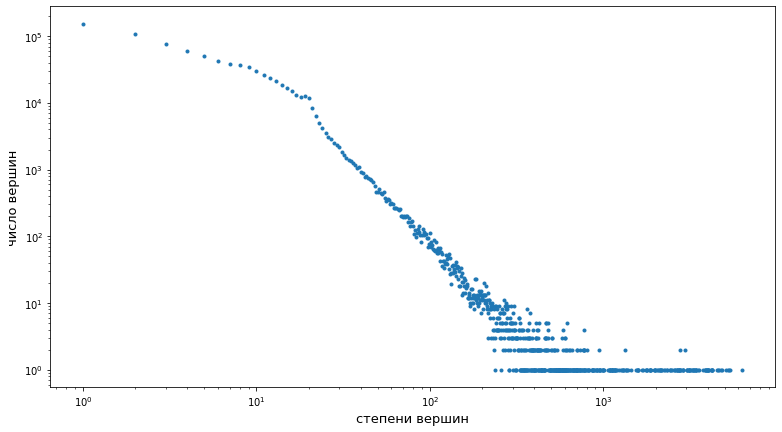

In [198]:
plt.figure(figsize=[13, 7])
plt.xlabel('степени вершин', fontsize=13)
plt.ylabel('число вершин', fontsize=13)
plt.loglog(degrees_sorted, number_of_nodes, ls="None", marker=".")
plt.show()

In [199]:
cumulative_degrees = {}
cumulative = 0
for degree in sorted(degrees.keys(), reverse=True):
    cumulative += degrees[degree]
    cumulative_degrees[degree] = cumulative
    

In [200]:
degrees_sorted_cum = sorted(cumulative_degrees.keys())
number_of_nodes_cum = [cumulative_degrees[i] for i in degrees_sorted_cum]

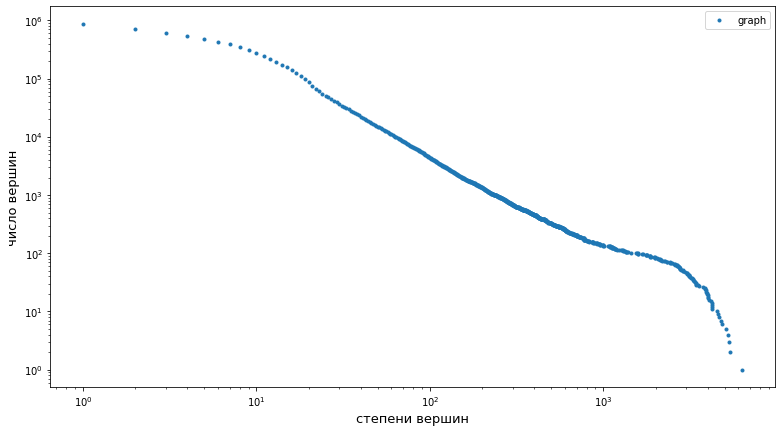

In [201]:
plt.figure(figsize=[13, 7])
plt.xlabel('степени вершин', fontsize=13)
plt.ylabel('число вершин', fontsize=13)
plt.loglog(degrees_sorted_cum, number_of_nodes_cum, ls="None", marker=".", label='graph')
plt.legend()
plt.show()

In [202]:
def func(d, c, y):
    return (c * (d ** y))

In [241]:
main = {}
for deg in cumulative_degrees:
    if deg >= 9 and deg <= 10000:
        main[deg] = cumulative_degrees[deg]

In [242]:
main_sorted_cum = sorted(main.keys())
main_nodes_cum = [main[i] for i in main_sorted_cum]

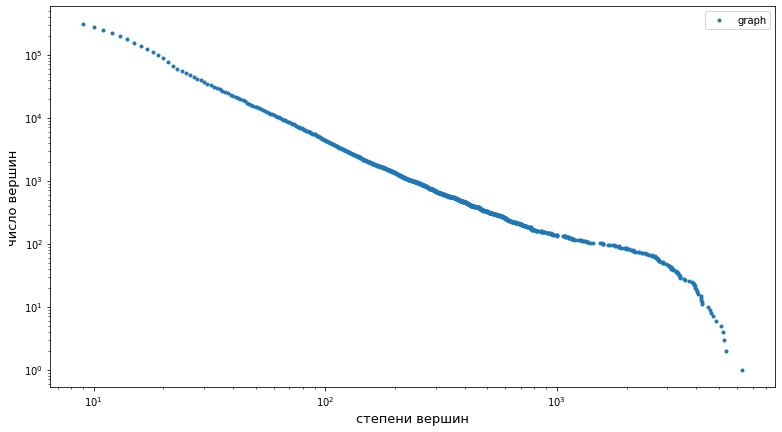

In [243]:
plt.figure(figsize=[13, 7])
plt.xlabel('степени вершин', fontsize=13)
plt.ylabel('число вершин', fontsize=13)
plt.loglog(main_sorted_cum, main_nodes_cum, ls="None", marker=".", label='graph')
plt.legend()
plt.show()

In [244]:
popt, pcov = curve_fit(func, main_sorted_cum, main_nodes_cum, bounds=([-np.inf, -3], [np.inf, 3]))
popt[1]

-1.7335479056489727

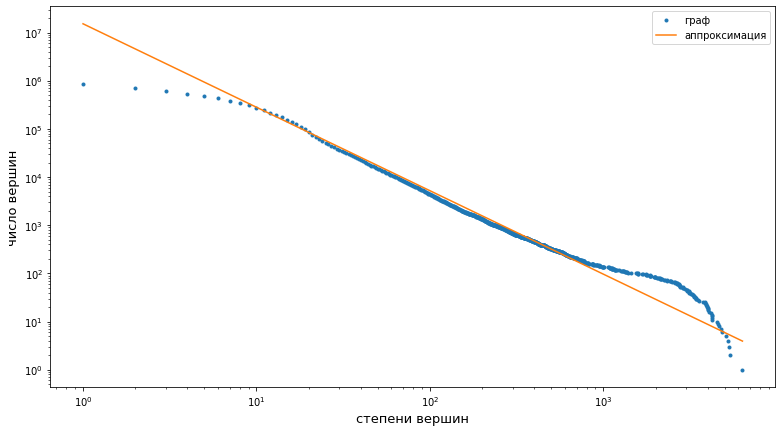

In [245]:
plt.figure(figsize=[13, 7])
plt.xlabel('степени вершин', fontsize=13)
plt.ylabel('число вершин', fontsize=13)
plt.loglog(degrees_sorted_cum, number_of_nodes_cum, ls="None", marker=".", label='граф')
plt.loglog(degrees_sorted_cum, func( degrees_sorted_cum, *popt), label='аппроксимация' )
plt.legend()
plt.show()